In [169]:

import torch 
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from torch.autograd import Variable

In [170]:
#load csv file
directory = "data\linear"
file = "train.csv"
path = os.path.join(directory,file)
print(path)


data_frame = pd.read_csv(path)
x = data_frame[['x']]
y = data_frame[['y']]

data\linear\train.csv


In [171]:
x

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


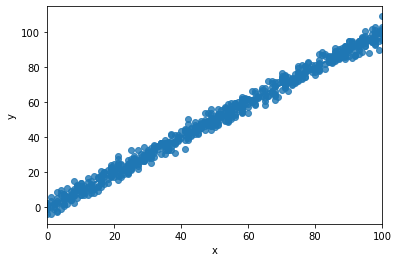

In [172]:
sns.regplot(x="x", y="y", data=data_frame);

In [173]:
arr = data_frame.iloc[0].to_numpy()
arr

array([24.        , 21.54945196])

In [174]:
#Implement own dataset

class LinearDataset(Dataset):

    def __init__(self,directory_path,file_name):
        super(LinearDataset,self).__init__()
        # assign path before read csv
        self.directory_path = directory_path
        self.file_name = file_name
        #join path

        data_directory = os.path.join(directory_path,file_name)

        #read csv
        data_frame = pd.read_csv(data_directory)
        self.x = torch.tensor(data_frame[['x']].values)
        self.y = torch.tensor(data_frame[['y']].values)

    def __len__(self):
        return data_frame.shape[0]
    
    def __getitem__(self,idx):
        return self.x[idx] , self.y[idx]
        

In [175]:
dataset = LinearDataset(directory_path = directory,file_name = file)

In [176]:
#define network
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [177]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
num_epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()


criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [178]:
dataload = torch.utils.data.DataLoader(dataset,batch_size = 10)

In [183]:
for epochs in range(num_epochs):
    for i,(data,label) in enumerate(dataload):
        X_train = Variable(data)
        y_train = Variable(label)

type=torch.float64)
tensor([[99.],
        [31.],
        [52.],
        [11.],
        [66.],
        [50.],
        [39.],
        [60.],
        [35.],
        [53.]], dtype=torch.float64)
tensor([[ 14.],
        [ 49.],
        [ 16.],
        [ 76.],
        [ 13.],
        [ 51.],
        [ 70.],
        [ 98.],
        [ 86.],
        [100.]], dtype=torch.float64)
tensor([[46.],
        [51.],
        [50.],
        [91.],
        [48.],
        [81.],
        [38.],
        [40.],
        [79.],
        [96.]], dtype=torch.float64)
tensor([[60.],
        [70.],
        [44.],
        [11.],
        [ 6.],
        [ 5.],
        [72.],
        [55.],
        [95.],
        [41.]], dtype=torch.float64)
tensor([[ 25.],
        [  1.],
        [ 55.],
        [  4.],
        [ 48.],
        [ 55.],
        [ 75.],
        [ 68.],
        [100.],
        [ 25.]], dtype=torch.float64)
tensor([[75.],
        [34.],
        [38.],
        [92.],
        [21.],
        [88.],
        [7